In [1]:
import importlib
import tensorflow as tf
from tensorflow import keras
import yaml
import os
import numpy as np
import json
import matplotlib.pyplot as plt

import dataset
import utils
importlib.reload(dataset)
importlib.reload(utils)
from dataset import *
import hydra
from hydra import compose, initialize
from omegaconf import OmegaConf



2023-04-26 06:51:17.514164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 06:51:17.632356: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 06:51:18.314353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-26 06:51:18.314402: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

# Wallerlab

In [6]:
config_name = "wallerlab_reconstruction"
model_path = '/home/jreymond/lensless_ml/stored_models/2023-04-25/wallerlab_unet.pb'

hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(config_path="configs", job_name="test_app")
config = compose(config_name= config_name)

/tmp/ipykernel_3619062/3938903348.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="configs", job_name="test_app")


In [29]:
num_samples = 5

print(config['dataset']['len'])
dataset_generator = WallerlabGenerator(config['dataset'],  
                                       indexes=np.arange(config['dataset']['len']), 
                                       batch_size=config['batch_size'],
                                       greyscale=config['greyscale'], 
                                       seed=config['seed'])

X, Y = dataset_generator.get_samples(num_samples)


24999
/scratch/bezzam/DiffuserCam_mirflickr/dataset/diffuser_images/im23544.npy
/scratch/bezzam/DiffuserCam_mirflickr/dataset/diffuser_images/im18447.npy
/scratch/bezzam/DiffuserCam_mirflickr/dataset/diffuser_images/im10436.npy
/scratch/bezzam/DiffuserCam_mirflickr/dataset/diffuser_images/im21630.npy
/scratch/bezzam/DiffuserCam_mirflickr/dataset/diffuser_images/im2706.npy


In [31]:
X.dtype

dtype('float32')

In [38]:
tests = [43, 65, 157, 189, 326, 394, 408, 643, 740]
X_test = np.zeros((len(tests), *X.shape[1:]), dtype=np.float32)
# Y_test = np.zeros((len(tests), *X.shape[1:]), dtype=np.float32)
Y_test = []
for index, i in enumerate(tests):
    filename = '/home/jreymond/lensless_ml/sample_imgs/wallerlab/diffuser/im' + str(i) + '.npy'
    X_test[index]= np.load(filename).transpose((2, 0, 1)).astype(np.float32)
    filename = '/home/jreymond/lensless_ml/sample_imgs/wallerlab/lensed/im' + str(i) + '.npy'
    Y_test.append(np.load(filename).transpose((2, 0, 1)).astype(np.float32))
num_samples = len(tests)
print(X_test.dtype)
X = X_test
Y = Y_test


float32


In [27]:

model = tf.saved_model.load(model_path)

In [36]:
Y_gen = model(tf.convert_to_tensor(X))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

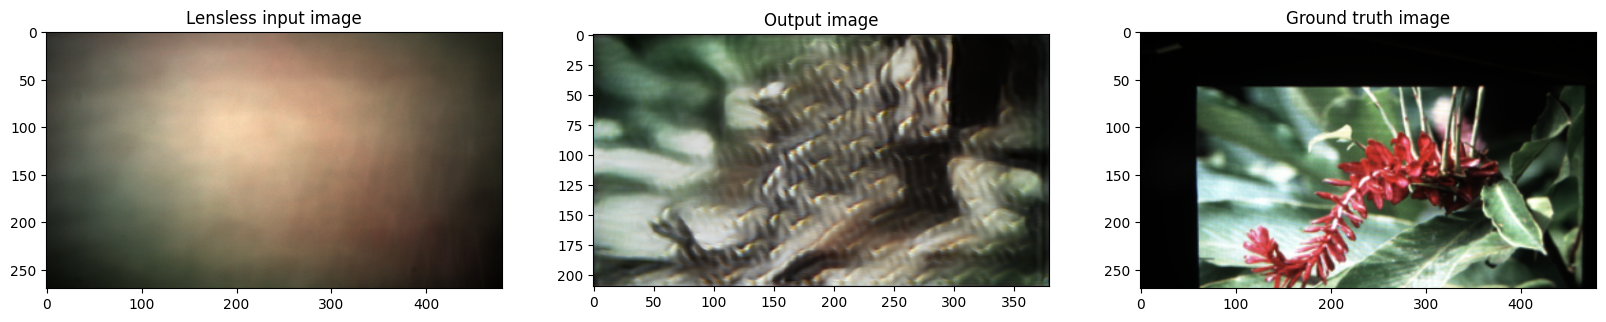

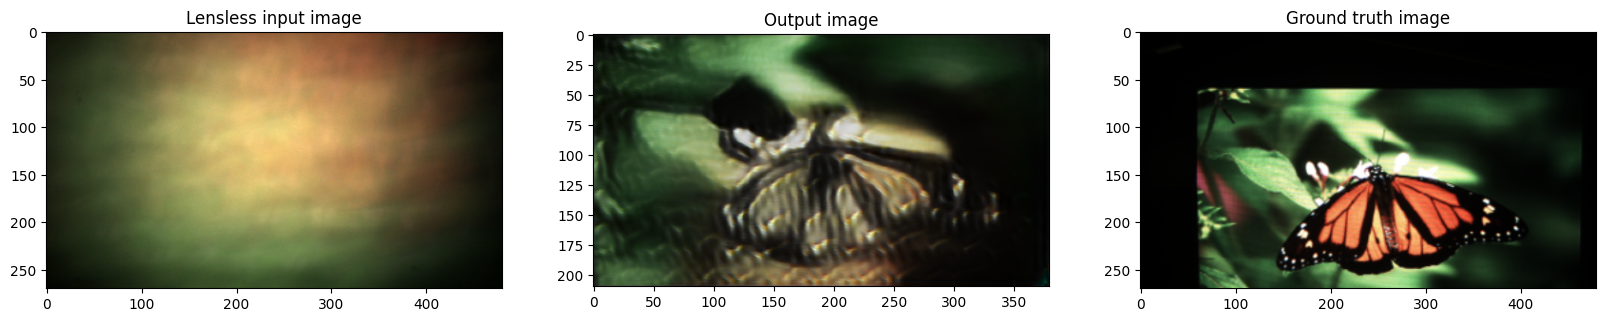

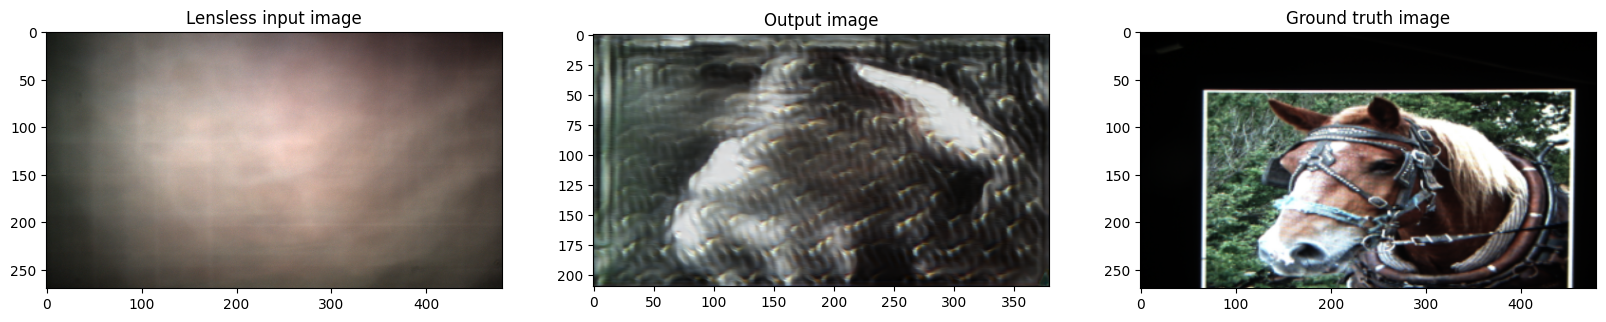

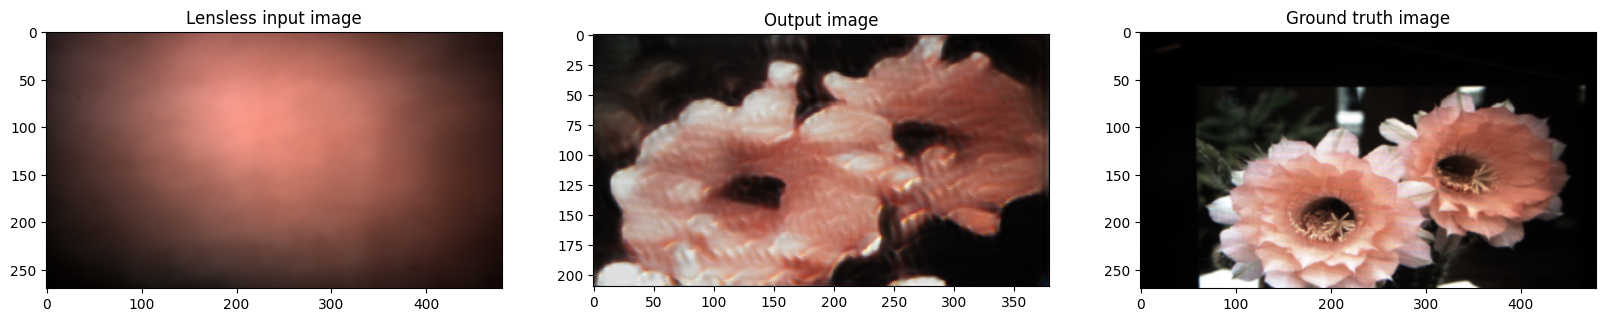

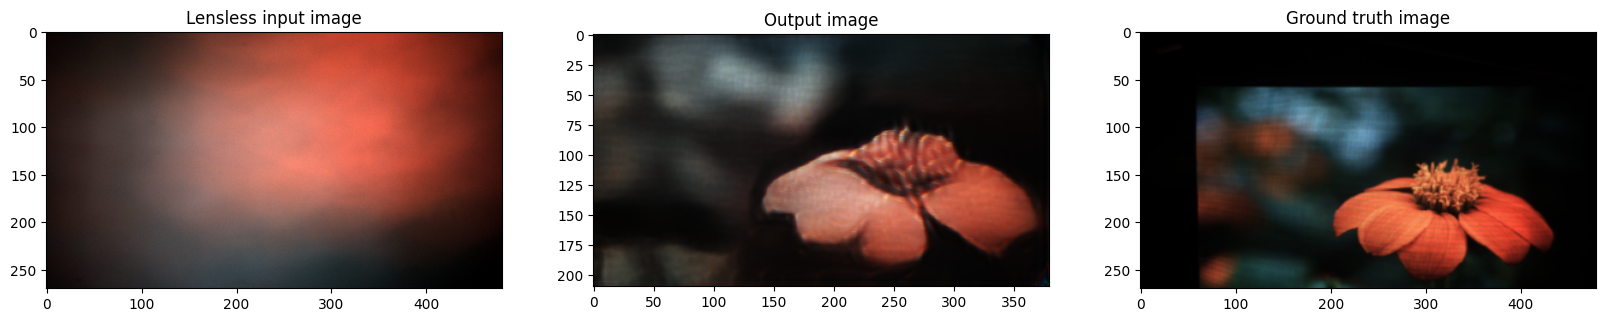

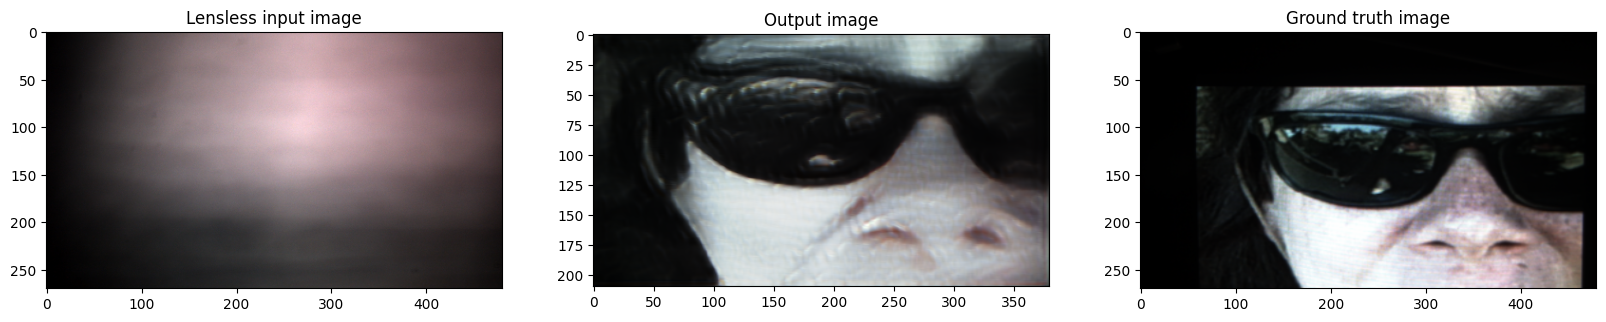

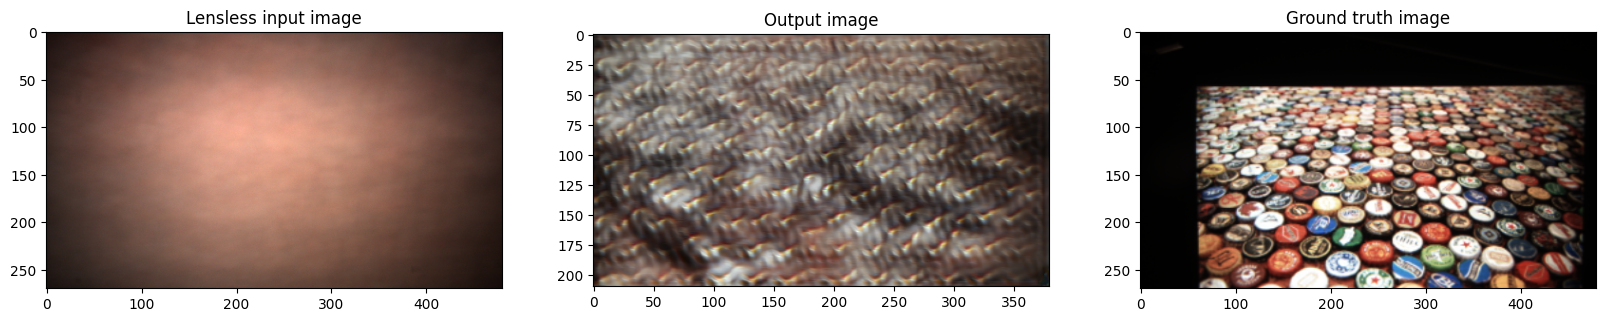

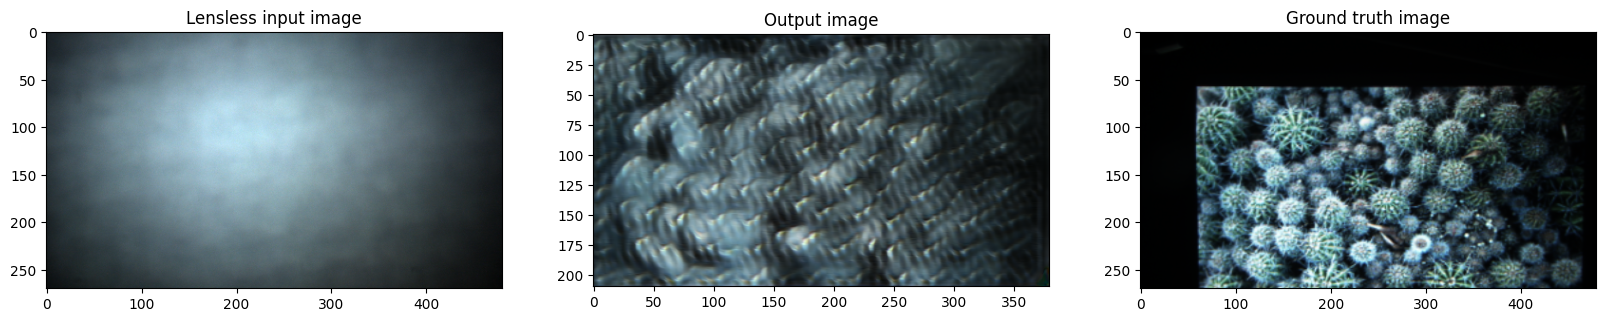

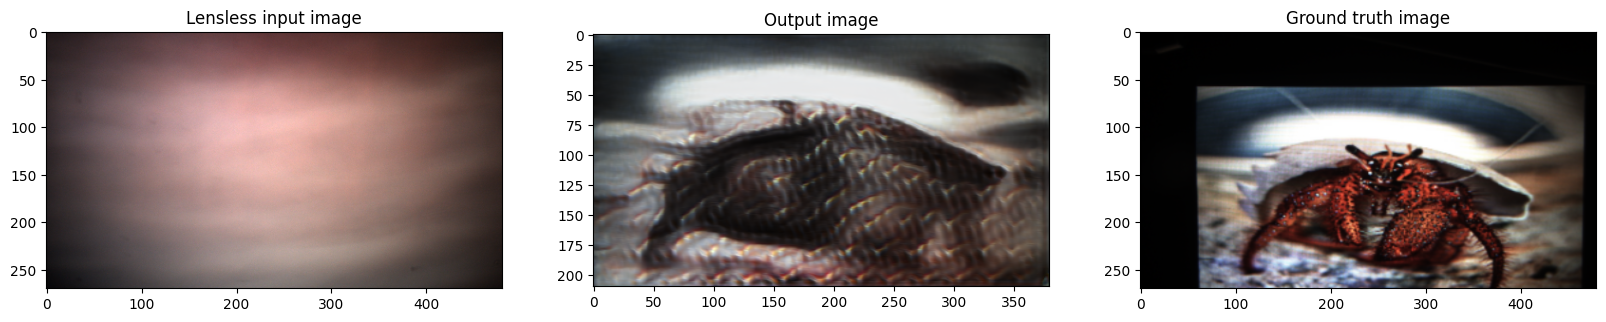

In [47]:
for i in range(num_samples):
    measurement = dataset_generator.to_plottable_measurement(X[i])[:,:,::-1]
    output = dataset_generator.to_plottable_output(Y_gen[i].numpy())[:,:,::-1]
    ground_truth = dataset_generator.to_plottable_output(Y[i])[:,:,::-1]

    fig1, ax = plt.subplots(1, 3, figsize=(20,5))
    ax[0].imshow(measurement)
    ax[0].set_title('Lensless input image')

    ax[1].imshow(output)
    ax[1].set_title('Output image')

    ax[2].imshow(ground_truth)
    ax[2].set_title('Ground truth image');

    fig1.savefig('figs/wallerlab_' + str(i), dpi=250)

# Flatnet

In [48]:
config_name = "flatnet_reconstruction"
model_path = '/home/jreymond/lensless_ml/stored_models/2023-04-25/flatnet_model.pb'

hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(config_path="configs", job_name="test_app")
config = compose(config_name= config_name)

/tmp/ipykernel_3619062/969353999.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="configs", job_name="test_app")
/home/jreymond/.conda/envs/pyth3_9/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'flatnet_reconstruction': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [49]:
num_samples = 5

print(config['dataset']['len'])
dataset_generator = PhlatnetDataGenerator(config['dataset'],  
                                       indexes=np.arange(config['dataset']['len']), 
                                       batch_size=config['batch_size'],
                                       seed=config['seed'])

X, Y = dataset_generator.get_samples(num_samples)

10000
in dim:  (4, 500, 620)
/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/measurements/n04192698/n04192698_61010..png
/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/measurements/n02277742/n02277742_36175..png
/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/measurements/n02096177/n02096177_6048..png
/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/measurements/n02825657/n02825657_11833..png
/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/measurements/n02979186/n02979186_12839..png


In [50]:
model = tf.saved_model.load(model_path)

In [51]:
Y_gen = model(tf.convert_to_tensor(X))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

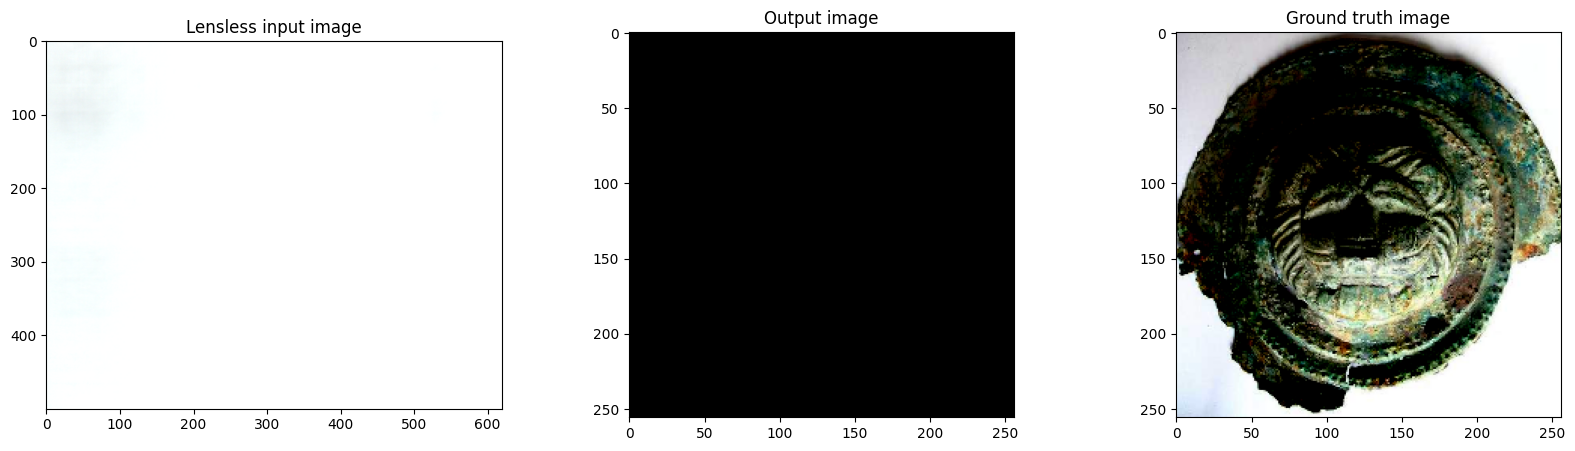

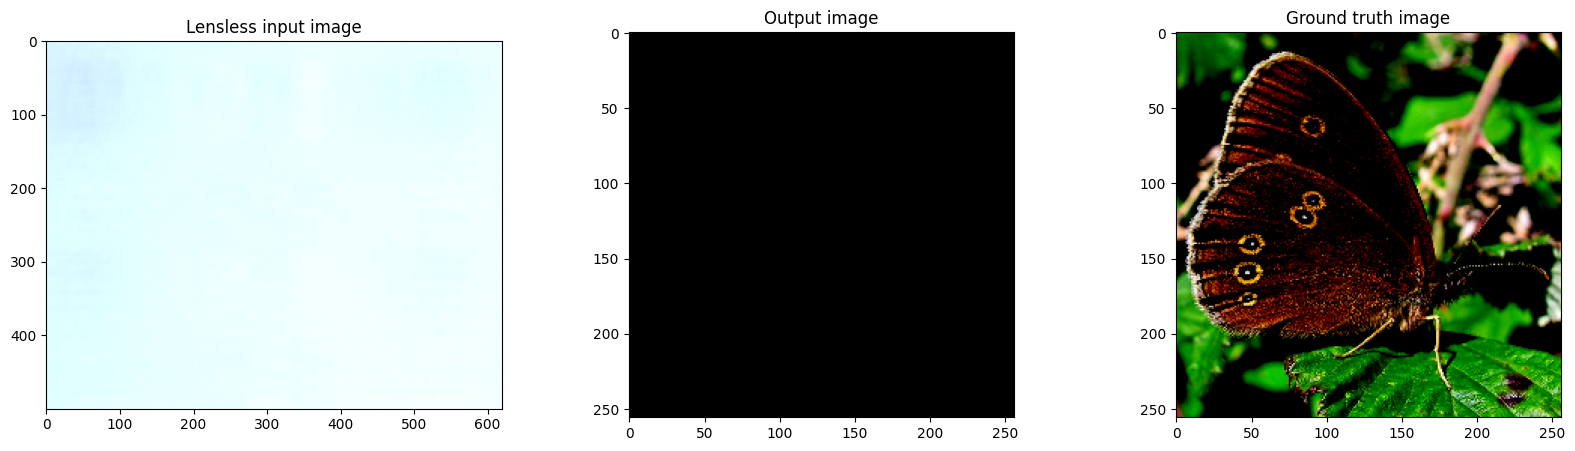

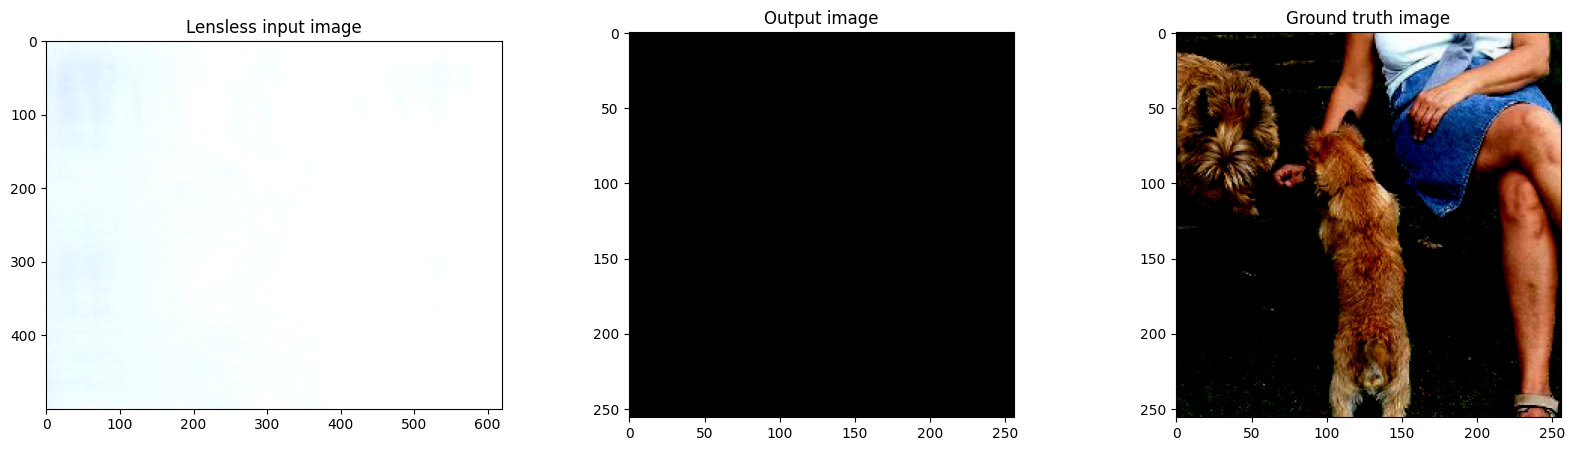

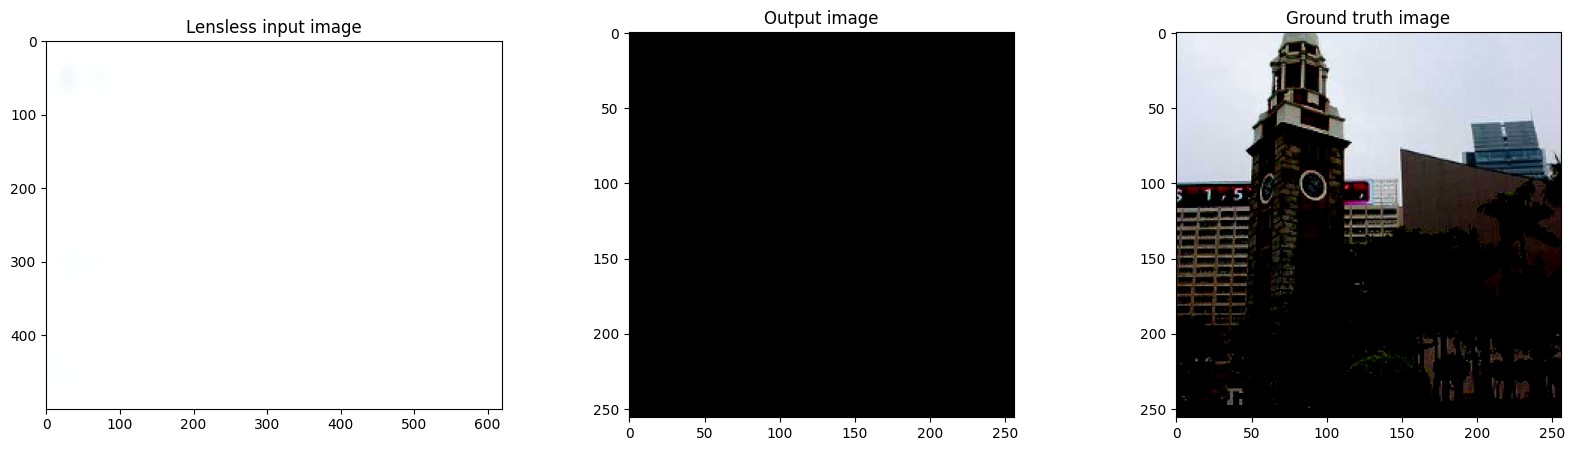

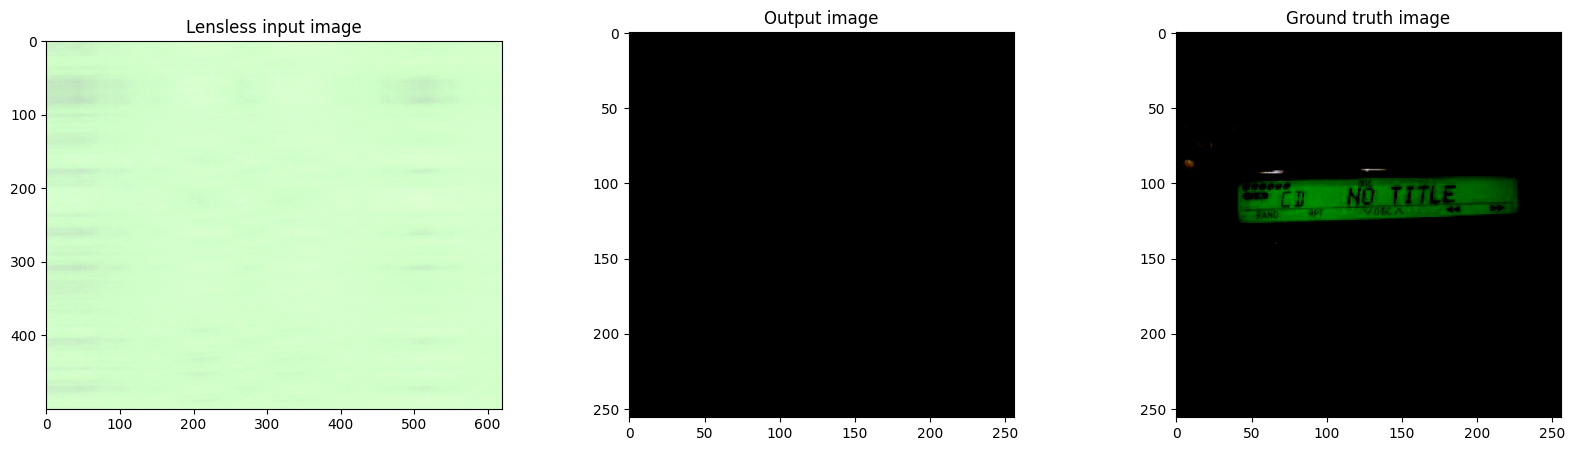

In [53]:
for i in range(num_samples):
    measurement = dataset_generator.to_plottable_measurement(X[i])
    output = dataset_generator.to_plottable_output(Y_gen[i].numpy())
    ground_truth = dataset_generator.to_plottable_output(Y[i])

    fig1, ax = plt.subplots(1, 3, figsize=(20,5))
    ax[0].imshow(measurement)
    ax[0].set_title('Lensless input image')

    ax[1].imshow(output)
    ax[1].set_title('Output image')

    ax[2].imshow(ground_truth)
    ax[2].set_title('Ground truth image');

    fig1.savefig('figs/wallerlab_' + str(i), dpi=250)